## WEB SCRAPING E ANÁLISE DE DADOS

### PROJETO-01
### Data Science no Mercado de Fundos Imobiliários - Web Scraping e Análise de Dados de FIIs
<img src="../pic/projeto-01.jpg">

## DEFINIÇÃO DO PROBLEMA

A Ciência de Dados está presente em todos os lugares. Dados podem ser extraídos da rede, tratados, analisados e gerar insights poderosos afim de obter valor. E no mercado de fundos imobiliários isso não seria diferente.

Informação, hoje, no mundo moderno é poder e os gestores sabem os benefícos e vantagem competiva em usar uma análise de dados para compreender seu comportamento e oferecer o melhor produto/serviço dentro de cada perfil de cliente. 

Para este projeto usaremos a técnica de Web Scraping com o objetivo de extrair dados de um site, tratar e fazer análises conforme regra de negócio.


### Fonte de Dados
Nossa fonte serão os sites:
- https://www.fundsexplorer.com.br/ranking 
- https://statusinvest.com.br/fundos-imobiliarios

## IMPORTANDO PACOTES | VERSÕES

In [1]:
# Importando Pacotes

import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Versos dos Pacotes usados neste jupyter nobebook

%reload_ext watermark
%watermark -a "Bi4YourData" --iversions

Author: Bi4YourData

numpy     : 1.18.1
matplotlib: 3.1.3
requests  : 2.28.2
yfinance  : 0.2.3
pandas    : 1.3.5



## OBTENDO DADOS

In [3]:
url = 'https://www.fundsexplorer.com.br/ranking'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.find(name='table')

df = pd.read_html(str(table), encoding='utf-8', decimal=',' , thousands='.')[0]
df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 3,25",8850.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.352.435,22","R$ 6,94",0.47,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 17,50",60.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 446.996.929,35","R$ 10,80",1.62,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 8,82",22230.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.688.895,17","R$ 13,26",0.67,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 925,00",150.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 224.382.977,88","R$ 2.018,25",0.46,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 13,30",1290.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -12.075.566,90","R$ -15,92",-0.84,NaN,NaN,NaN,NaN,NaN,NaN,1


## ANÁLISE EXPLORATÓRIA

In [4]:
# Colunas do dataframe

df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [5]:
# Incidência de registros dentro da coluna SETOR
# Títulos e Valor Mobiliário apresentam maior predominância

df.Setor.value_counts()

Títulos e Val. Mob.              92
Híbrido                          49
Lajes Corporativas               41
Outros                           39
Shoppings                        24
Logística                        22
Residencial                      10
Hospital                          4
Hotel                             3
Renda                             1
Títulos e Valores Mobiliários     1
Name: Setor, dtype: int64

In [6]:
# Incidência de registros, em percentual, dentro da coluna SETOR
# Títulos e Val. Mob. apresenta maior predominância 

np.divide(df.Setor.value_counts(), df.Setor.count())

Títulos e Val. Mob.              0.321678
Híbrido                          0.171329
Lajes Corporativas               0.143357
Outros                           0.136364
Shoppings                        0.083916
Logística                        0.076923
Residencial                      0.034965
Hospital                         0.013986
Hotel                            0.010490
Renda                            0.003497
Títulos e Valores Mobiliários    0.003497
Name: Setor, dtype: float64

In [7]:
# Quantidade de registros nulos

df.isna().sum()

Códigodo fundo               0
Setor                       16
Preço Atual                  6
Liquidez Diária              6
Dividendo                    0
DividendYield                6
DY (3M)Acumulado             6
DY (6M)Acumulado             6
DY (12M)Acumulado            6
DY (3M)Média                 6
DY (6M)Média                 6
DY (12M)Média                6
DY Ano                      24
Variação Preço               6
Rentab.Período               6
Rentab.Acumulada             6
PatrimônioLíq.               9
VPA                          9
P/VPA                       15
DYPatrimonial              223
VariaçãoPatrimonial        223
Rentab. Patr.no Período    223
Rentab. Patr.Acumulada     223
VacânciaFísica             177
VacânciaFinanceira         272
QuantidadeAtivos             0
dtype: int64

In [8]:
# Verificando informações do df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           302 non-null    object 
 1   Setor                    286 non-null    object 
 2   Preço Atual              296 non-null    object 
 3   Liquidez Diária          296 non-null    float64
 4   Dividendo                302 non-null    object 
 5   DividendYield            296 non-null    object 
 6   DY (3M)Acumulado         296 non-null    object 
 7   DY (6M)Acumulado         296 non-null    object 
 8   DY (12M)Acumulado        296 non-null    object 
 9   DY (3M)Média             296 non-null    object 
 10  DY (6M)Média             296 non-null    object 
 11  DY (12M)Média            296 non-null    object 
 12  DY Ano                   278 non-null    object 
 13  Variação Preço           296 non-null    object 
 14  Rentab.Período           2

In [9]:
# Estatística dos Registros

df.describe()

,Liquidez Diária,P/VPA,QuantidadeAtivos
count,2.960000e+02,287.000000,302.000000
mean,2.620979e+05,0.859582,2.913907
std,1.900014e+06,0.610561,7.498341
min,1.000000e+01,-0.840000,0.000000
25%,1.980000e+03,0.720000,0.000000
50%,1.895000e+04,0.850000,0.000000
75%,1.234150e+05,0.950000,2.000000
max,3.180000e+07,9.610000,72.000000


## LIMPEZA E TRATAMENTO DE DADOS

### Tratando Registros Nulos da Coluna "Setor"

In [10]:
# Exibição de registros da coluna Setor que são nulos

categorical_columns = ['Códigodo fundo', 'Setor']
df[df.Setor.isna()].head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
65,PLCA11,NaN,"R$ 95,43",4150.0,"R$ 1,10","1,15%","2,28%","0,00%","0,00%","0,76%",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100,HGAG11,NaN,"R$ 26,50",11000.0,"R$ 1,60","1,53%","2,68%","0,00%","0,00%","0,89%",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
107,LSAG11,NaN,"R$ 109,38",150.0,"R$ 1,23","1,08%","2,56%","2,56%","0,00%","0,85%",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
136,RURA11,NaN,"R$ 10,46",781810.0,"R$ 0,14","1,35%","2,42%","2,42%","0,00%","0,81%",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
191,VCRI11,NaN,"R$ 8,93",399680.0,"R$ 0,13","1,38%","4,02%","8,27%","0,00%","1,34%",...,"R$ 167.913.154,23","R$ 9,45",0.95,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# Exibição dos índices da coluna Setor cujo registros são nulos

df[df.Setor.isna()].index

Int64Index([65, 100, 107, 136, 191, 201, 203, 206, 212, 222, 224, 233, 237,
            242, 257, 285],
           dtype='int64')

In [12]:
# Filtrando o df e trazendo o Código do fundo cujo Setores são nulos

null_sectors = df['Códigodo fundo'][df.Setor.isna()].values
print(null_sectors)

['PLCA11' 'HGAG11' 'LSAG11' 'RURA11' 'VCRI11' 'SNAG11' 'ERPA11' 'OIAG11'
 'BIME11' 'DCRA11' 'FGAA11' 'GTLG11' 'CXCI11' 'AGRX11' 'CPTR11' 'NCRA11']


In [13]:
def get_sectors(ticker):

    headers = { 
        'User-Agent'      : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 
        'Accept'          : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', 
        'Accept-Language' : 'en-US,en;q=0.5',
        'DNT'             : '1', # Do Not Track Request Header 
        'Connection'      : 'close'
    }

    url = f'https://statusinvest.com.br/fundos-imobiliarios/{ticker}/' 
    response = requests.get(url, headers=headers, timeout=5)
    soup = BeautifulSoup(response.text, 'html.parser')
    infos = soup.find_all('div', {'class': 'top-info-1'})

    for element in infos:
        list_of_values = element.find_all('strong', {'class': 'value'})
        if len(list_of_values) > 5:
            sector = list_of_values[5]
            return sector.text     
    

In [14]:
# Exibindo o Código do Fundo para seus respectivos setores
# NOTA-SE: O site não encontrou alguns FIIs

list_sectors = list(map(lambda x: [x, get_sectors(x)], null_sectors))
print(list_sectors)

[['PLCA11', None], ['HGAG11', None], ['LSAG11', None], ['RURA11', None], ['VCRI11', 'Títulos e Valores Mobiliários'], ['SNAG11', None], ['ERPA11', 'Lajes Corporativas'], ['OIAG11', None], ['BIME11', 'Híbrido'], ['DCRA11', None], ['FGAA11', None], ['GTLG11', 'Logística'], ['CXCI11', 'Títulos e Valores Mobiliários'], ['AGRX11', None], ['CPTR11', None], ['NCRA11', None]]


In [15]:
# Atribuição do Setor para seus respectivo fundo imbiliário

for setor in list_sectors:    
    df.loc[df['Códigodo fundo'] == setor[0], 'Setor'] = setor[1]

### Ajustando Dataframe

In [16]:
# Ajuste do tipo coluna - Parte-01

df[['Códigodo fundo', 'Setor']] = df[['Códigodo fundo', 'Setor']].astype('category')

In [17]:
# Ajuste do tipo coluna - Parte-02

float_column = list(df.iloc[:,2:-1])
df[float_column].columns

Index(['Preço Atual', 'Liquidez Diária', 'Dividendo', 'DividendYield',
       'DY (3M)Acumulado', 'DY (6M)Acumulado', 'DY (12M)Acumulado',
       'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira'],
      dtype='object')

In [18]:
# Tratando dados- ETL-PARTE_01
# Tratando valores nulos

df[float_column] = df[float_column].fillna(value=0)

In [19]:
# Exibição de dados nulos
# NOTA-SE: 11 Setores apenas estão nulos

df.isna().sum()

Códigodo fundo              0
Setor                      11
Preço Atual                 0
Liquidez Diária             0
Dividendo                   0
DividendYield               0
DY (3M)Acumulado            0
DY (6M)Acumulado            0
DY (12M)Acumulado           0
DY (3M)Média                0
DY (6M)Média                0
DY (12M)Média               0
DY Ano                      0
Variação Preço              0
Rentab.Período              0
Rentab.Acumulada            0
PatrimônioLíq.              0
VPA                         0
P/VPA                       0
DYPatrimonial               0
VariaçãoPatrimonial         0
Rentab. Patr.no Período     0
Rentab. Patr.Acumulada      0
VacânciaFísica              0
VacânciaFinanceira          0
QuantidadeAtivos            0
dtype: int64

In [20]:
# Tratando dados- ETL-PARTE_02

df[float_column] = df[float_column]\
    .applymap(lambda x: str(x) \
        .replace('R$' , '') \
        .replace('.' , '') \
        .replace('%', '') \
        .replace(',' , '.')
    )

In [21]:
# Tratando dados- ETL-PARTE_03

df[float_column] = df[float_column].astype('float') 

In [22]:
# Tratando dados- ETL-PARTE_04
# Ajustando valores percentuais

df['P/VPA'] = df['P/VPA'] / 100

In [23]:
# Exibição dos dados do tipo: category , float64 e int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           302 non-null    category
 1   Setor                    291 non-null    category
 2   Preço Atual              302 non-null    float64 
 3   Liquidez Diária          302 non-null    float64 
 4   Dividendo                302 non-null    float64 
 5   DividendYield            302 non-null    float64 
 6   DY (3M)Acumulado         302 non-null    float64 
 7   DY (6M)Acumulado         302 non-null    float64 
 8   DY (12M)Acumulado        302 non-null    float64 
 9   DY (3M)Média             302 non-null    float64 
 10  DY (6M)Média             302 non-null    float64 
 11  DY (12M)Média            302 non-null    float64 
 12  DY Ano                   302 non-null    float64 
 13  Variação Preço           302 non-null    float64 
 14  Rentab.Per

In [24]:
# Ixibição do dataframe ajustado

df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,3.25,88500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.535244e+07,6.94,0.47,0.0,0.0,0.0,0.0,56.00,0.0,1
1,BZLI11,Títulos e Val. Mob.,17.50,600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.469969e+08,10.80,1.62,0.0,0.0,0.0,0.0,0.00,0.0,0
2,XTED11,Lajes Corporativas,8.82,222300.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.768890e+07,13.26,0.67,0.0,0.0,0.0,0.0,0.00,100.0,1
3,ALMI11,Lajes Corporativas,925.00,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.243830e+08,2018.25,0.46,0.0,0.0,0.0,0.0,64.05,0.0,1
4,PABY11,Híbrido,13.30,12900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207557e+07,-15.92,-0.84,0.0,0.0,0.0,0.0,0.00,0.0,1


## ANÁLISE DOS DADOS
### Definição de Regra de Negócio

O gestor de negócio solicitou uma análise dos seguintes FIIs, onde:

  - O Preço Atual do fundo seja menor ou igual a 200;
  - A quantidade de dividendos maior que 0,75
  - O Preço sobre o valor patrimonal menor que 1
  
Ele deseja ver os fundos imobiliários em função do seu preço atual, quais estão pagando mais dentro do acumulado de 12 meses e quais estão pagando na média.

In [25]:
def set_ideal_investiments_funds(df):
    filter_clause = \
        (df['Preço Atual'] <= 200) & \
        (df['Dividendo'] > 0.75) & \
        (df['P/VPA'] < 1.0)
        
    return df[filter_clause]

In [26]:
# Listagem dos fundos imobiliários conforme Regra de Negócio

df_rule = set_ideal_investiments_funds(df)
df_rule.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
5,ORPD11,Títulos e Val. Mob.,11.00,5000.0,1.38,0.00,0.00,0.00,0.00,0.00,...,4.296797e+07,148.17,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0
7,PRSV11,Lajes Corporativas,125.19,1000.0,1.62,0.42,1.53,2.91,5.95,0.51,...,4.287577e+07,219.88,0.57,0.00,0.00,0.00,0.00,40.9,0.0,2
14,HRDF11,Híbrido,0.85,11900.0,6.80,0.00,0.00,0.00,0.00,0.00,...,9.357437e+06,1.23,0.69,0.00,0.00,0.00,0.00,0.0,0.0,0
31,BTCR11,Títulos e Val. Mob.,88.00,666300.0,0.90,1.00,2.93,6.64,13.56,0.98,...,4.582527e+08,95.27,0.92,0.94,0.64,1.59,4.62,0.0,0.0,0
38,GTWR11,Lajes Corporativas,73.78,676300.0,0.79,0.99,2.82,5.67,11.40,0.94,...,1.136411e+09,94.70,0.78,0.00,0.00,0.00,0.00,0.0,0.0,1


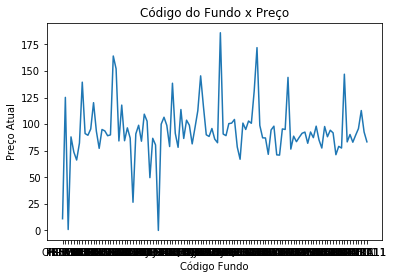

In [27]:
# Exibição dos fundos imobiliários em função do seu preço atual

plt.plot(df_rule['Códigodo fundo'], df_rule['Preço Atual'] )

plt.title('Código do Fundo x Preço')
plt.ylabel('Preço Atual')
plt.xlabel('Código Fundo')
plt.show()

### Qual fundo esta pagando mais dentro do acumulado em 12 meses ?

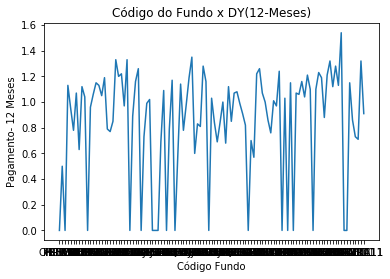

In [28]:
# Exibição dos fundos imobiliários em função do acumulado em 12 meses

plt.plot(df_rule['Códigodo fundo'], df_rule['DY (12M)Média'] )

plt.title('Código do Fundo x DY(12-Meses)')
plt.ylabel('Pagamento- 12 Meses')
plt.xlabel('Código Fundo')
plt.show()

In [29]:
# Valor do fundo que paga mais

np.max(df_rule['DY (12M)Média'])

1.54

In [30]:
#  Fundo que esta pagando mais no acumulado de 12 meses

df_rule[df_rule['DY (12M)Média'] == 1.54]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
278,BRLA11,Híbrido,147.0,40000.0,1.09,0.75,13.41,14.94,18.42,4.47,...,4.268275e+08,157.77,0.93,0.69,0.04,0.74,-8.63,0.0,0.0,0


### Quais fundos imobiliários estão pagando, em média, dentro do acumulado de 12 meses ?

In [31]:
# Valor do fundo que paga mais

np.mean(df_rule['DY (12M)Média'])

0.8421100917431189

In [32]:
# Listagem dos fundos que estão pagando, em média, no acumulado de 12 meses 

df_rule[df_rule['DY (12M)Média'] == 0.85]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
90,RNDP11,Títulos e Val. Mob.,152.1,5500.0,0.81,0.52,1.86,4.47,10.16,0.62,...,2.078188e+07,193.35,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0
187,TRXF11,Outros,104.4,1887800.0,1.20,1.14,2.73,5.11,10.22,0.91,...,9.365878e+08,105.45,0.99,0.0,0.0,0.0,0.0,0.0,0.0,44


## FIM